## Importing Packages

In [1]:
import pandas as pd
import numpy as np

## Reading the data

In [2]:
PATHS = [
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Monday-WorkingHours.pcap_ISCX.csv',
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Tuesday-WorkingHours.pcap_ISCX.csv',
    '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/Information-Security/testdata-intrusion/Wednesday-workingHours.pcap_ISCX.csv'
    
]
df = pd.read_csv(PATHS[0])
for i in range(1,len(PATHS)):
    temp = pd.read_csv(PATHS[i])
    df = pd.concat([df,temp])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/testdata-intrusion/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

In [ ]:
m = df.loc[df[' Flow Packets/s'] != np.inf,' Flow Packets/s'].max()
df[' Flow Packets/s'].replace(np.inf,m,inplace=True)
m = df.loc[df['Flow Bytes/s'] != np.inf,'Flow Bytes/s'].max()
df['Flow Bytes/s'].replace(np.inf,m,inplace=True)

In [ ]:
dtypes = df.dtypes
print(f"Number of columns with Int {len(dtypes[dtypes == int])}")
print(f"Number of columns with float {len(dtypes[dtypes == float])}")
print(f"Number of columns with object {len(dtypes[dtypes == object])}")

Number of columns with Int 54
Number of columns with float 24
Number of columns with object 1


In [ ]:
null_values = df.isna().sum()
null_values[null_values >0]

Flow Bytes/s    1358
dtype: int64

In [ ]:
null_index = np.where(df['Flow Bytes/s'].isnull())[0]
df.dropna(inplace = True)

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df[' Label'].value_counts()

BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [ ]:
df[' Destination Port']

0         54865
1         55054
2         55055
3         46236
4         54863
          ...  
692698       53
692699       53
692700    58030
692701       53
692702       53
Name:  Destination Port, Length: 2829385, dtype: int64

In [ ]:
temp = df[df[' Label'] == 'BENIGN']
temp[' Destination Port'].describe()
temp = temp.sample(frac = 0.1)

In [ ]:
df = df[df[' Label'] != 'BENIGN']
df = pd.concat([df,temp])

## Some Visualizations

<Axes: >

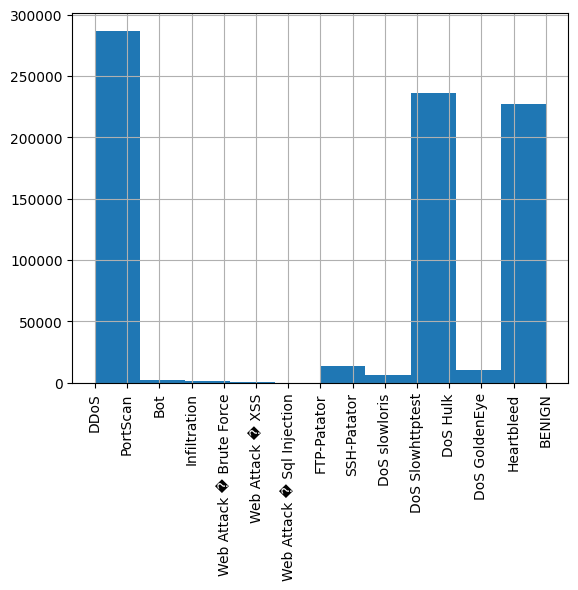

In [ ]:
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
df[' Label'].hist()

Heavy class imbalance... :((

In [ ]:
df[' Label'].value_counts()

DoS Hulk                      230124
BENIGN                        227269
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name:  Label, dtype: int64

Let's see if we can fix this

In [ ]:
from sklearn.model_selection import StratifiedKFold
df['folds'] = 0
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for i, (_, test_index) in enumerate(skf.split(df[[' Destination Port']], df[' Label'])):
    df.iloc[test_index, -1] = i

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,folds
18883,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,0.0,0.0,0,0,0.0,0.0,0,0,DDoS,5
18884,80,4421382,4,0,24,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,DDoS,4
18885,80,1083538,3,6,26,11601,20,0,8.666667,10.263203,...,0.0,0.0,0,0,0.0,0.0,0,0,DDoS,3
18886,80,80034360,8,4,56,11601,20,0,7.000000,5.656854,...,939.0,0.0,939,939,39300000.0,44200000.0,70600000,8072664,DDoS,5
18887,80,642654,3,6,26,11607,20,0,8.666667,10.263203,...,0.0,0.0,0,0,0.0,0.0,0,0,DDoS,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383028,53,1214,2,2,82,212,41,41,41.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
345443,53,195,2,2,66,98,33,33,33.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,6
262202,53,401,1,1,55,116,55,55,55.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,2
661631,53,61029,2,2,70,444,35,35,35.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,5


In [ ]:
#df = pd.get_dummies(df)

In [ ]:
col = [' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']

In [ ]:
train_df= df[df['folds'] != 5]
valid_df = df[df['folds'] == 5]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[col] = scaler.fit_transform(train_df[col])
valid_df[col] = scaler.transform(valid_df[col])

/var/folders/m8/j7dlkldd2ngfxnycbdnr2cd00000gn/T/ipykernel_19797/2638592671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = scaler.fit_transform(train_df[col])
/var/folders/m8/j7dlkldd2ngfxnycbdnr2cd00000gn/T/ipykernel_19797/2638592671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df[col] = scaler.transform(valid_df[col])


In [ ]:
train_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,folds
18884,0.001221,0.036845,0.000015,0.000000,0.000008,0.000000e+00,0.000257,0.003026,0.001010,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DDoS,4
18885,0.001221,0.009030,0.000010,0.000022,0.000009,1.850239e-05,0.000856,0.000000,0.001459,0.001456,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DDoS,3
18887,0.001221,0.005355,0.000010,0.000022,0.000009,1.851196e-05,0.000856,0.000000,0.001459,0.001456,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DDoS,7
18888,0.001221,0.664431,0.000035,0.000019,0.000020,1.850239e-05,0.000856,0.000000,0.001178,0.000802,...,0.000011,0.0,0.000011,0.000011,0.326667,0.577373,0.588333,0.064721,DDoS,7
18890,0.001221,0.664837,0.000035,0.000015,0.000020,1.851196e-05,0.000856,0.000000,0.001178,0.000802,...,0.000011,0.0,0.000011,0.000011,0.328333,0.582575,0.592500,0.064629,DDoS,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31468,0.000809,0.000199,0.000005,0.000007,0.000031,2.328549e-07,0.001926,0.022693,0.007575,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,9
383028,0.000809,0.000010,0.000005,0.000007,0.000029,3.381180e-07,0.001755,0.020676,0.006901,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0
345443,0.000809,0.000002,0.000005,0.000007,0.000023,1.562998e-07,0.001413,0.016641,0.005555,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,6
262202,0.000809,0.000003,0.000000,0.000004,0.000019,1.850080e-07,0.002354,0.027736,0.009258,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,2


In [ ]:
X_train = train_df[col]
y_train = train_df[' Label']
X_test = valid_df[col]
y_test = valid_df[' Label']

In [ ]:
X_train.shape, X_test.shape

((705569, 78), (78397, 78))

In [ ]:
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report
pred=KNN_model.predict(X_test[:10000])
print(classification_report(y_test[:10000], pred))

/Users/fatimaanwar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fatimaanwar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      BENIGN       0.00      0.00      0.00         0
        DDoS       1.00      1.00      1.00     10000
    DoS Hulk       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       1.00      1.00      1.00     10000



/Users/fatimaanwar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df2 = pd.get_dummies(df)
train_df2 = df2[df2['folds'] != 5]
valid_df2 = df2[df2['folds'] == 5]
scaler = MinMaxScaler()
train_df2[col] = scaler.fit_transform(train_df2[col])
valid_df2[col] = scaler.transform(valid_df2[col])

/var/folders/m8/j7dlkldd2ngfxnycbdnr2cd00000gn/T/ipykernel_19797/4187460574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df2[col] = scaler.fit_transform(train_df2[col])
/var/folders/m8/j7dlkldd2ngfxnycbdnr2cd00000gn/T/ipykernel_19797/4187460574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df2[col] = scaler.transform(valid_df2[col])


In [ ]:
def create_ae_mlp(num_columns, num_labels, hidden_units, dropout_rates, ls = 1e-2, lr = 1e-3):
    
    inp = tf.keras.layers.Input(shape = (num_columns, ))
    x0 = tf.keras.layers.BatchNormalization()(inp)
    
    #Encoder
    encoder = tf.keras.layers.GaussianNoise(dropout_rates[0])(x0)
    encoder = tf.keras.layers.Dense(hidden_units[0])(encoder)
    encoder = tf.keras.layers.BatchNormalization()(encoder)
    encoder = tf.keras.layers.Activation('swish')(encoder)
    
    #Decoder
    decoder = tf.keras.layers.Dropout(dropout_rates[1])(encoder)
    decoder = tf.keras.layers.Dense(num_columns, name = 'decoder')(decoder)
    
    
    x_ae = tf.keras.layers.Dense(hidden_units[1])(decoder)
    x_ae = tf.keras.layers.BatchNormalization()(x_ae)
    x_ae = tf.keras.layers.Activation('swish')(x_ae)
    x_ae = tf.keras.layers.Dropout(dropout_rates[2])(x_ae)

    out_ae = tf.keras.layers.Dense(num_labels, activation = 'sigmoid', name = 'ae_action')(x_ae)
    
    #Multi Layer perceptron
    x = tf.keras.layers.Concatenate()([x0, encoder])
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rates[3])(x)
    
    for i in range(2, len(hidden_units)):
        x = tf.keras.layers.Dense(hidden_units[i])(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('swish')(x)
        x = tf.keras.layers.Dropout(dropout_rates[i + 2])(x)
        
    out = tf.keras.layers.Dense(num_labels, activation = 'sigmoid', name = 'action')(x)
    
    model = tf.keras.models.Model(inputs = inp, outputs = [out_ae, out])
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
                  loss = {
                          'ae_action': tf.keras.losses.BinaryCrossentropy(label_smoothing = ls),
                          'action': tf.keras.losses.BinaryCrossentropy(label_smoothing = ls), 
                         },
                  metrics = { 
                             'ae_action': tf.keras.metrics.AUC(name = 'AUC'), 
                             'action': tf.keras.metrics.AUC(name = 'AUC'), 
                            }, 
                 )
    
    return model

In [ ]:
train_df2.iloc[:,-15:].columns

Index([' Label_BENIGN', ' Label_Bot', ' Label_DDoS', ' Label_DoS GoldenEye',
       ' Label_DoS Hulk', ' Label_DoS Slowhttptest', ' Label_DoS slowloris',
       ' Label_FTP-Patator', ' Label_Heartbleed', ' Label_Infiltration',
       ' Label_PortScan', ' Label_SSH-Patator',
       ' Label_Web Attack � Brute Force', ' Label_Web Attack � Sql Injection',
       ' Label_Web Attack � XSS'],
      dtype='object')

In [ ]:
params = {'num_columns': len(col), 
          'num_labels': 15, 
          'hidden_units': [96, 96, 896, 448, 448, 256], 
          'dropout_rates': [0.03527936123679956, 0.038424974585075086, 0.42409238408801436, 0.10431484318345882, 0.49230389137187497, 0.32024444956111164, 0.2716856145683449, 0.4379233941604448], 
          'ls': 0, 
          'lr':1e-3, 
         }

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
batch_size = 64

In [ ]:
fold = 5
ckp_path = f'JSModel_{fold}.hdf5'
model = create_ae_mlp(**params)
ckp = ModelCheckpoint(ckp_path, monitor = 'val_action_AUC', verbose = 0, 
                      save_best_only = True, save_weights_only = True, mode = 'max')
es = EarlyStopping(monitor = 'val_action_AUC', min_delta = 1e-4, patience = 20, mode = 'max', 
                   baseline = None, restore_best_weights = True, verbose = 0)
history = model.fit(train_df2[col], [train_df2.iloc[:,-15:],train_df2.iloc[:,-15:]], 
                    validation_data = (valid_df2[col], [ valid_df2.iloc[:,-15:],valid_df2.iloc[:,-15:]]), 
                    epochs = 20, batch_size = batch_size, callbacks = [ckp, es], verbose = True)

In [ ]:
hist = pd.DataFrame(history.history)
score = hist['val_action_AUC'].max()

In [ ]:
model = create_ae_mlp(**params)
model.load_weights('../input/model-intrusion/JSModel_5.hdf5')

## prediction and testing

In [ ]:
arr = valid_df2[col].iloc[0].to_numpy()

In [ ]:
def predict_label(model, X):
    output_labels = ['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye',
       'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris',
       'FTP-Patator', 'Heartbleed', 'Infiltration',
       'PortScan', 'SSH-Patator',
       'Web Attack - Brute Force', 'Web Attack - Sql Injection',
       'Web Attack - XSS']
    prediction = model.predict(pd.Series(X).to_numpy().reshape(1, -1))
    return_dict = {}
    return_dict['label'] = output_labels[list(prediction[1][0]).index(1.)]
    return_dict['prediction'] = prediction
    return return_dict


In [ ]:
num = 8999
arr = valid_df2[col].iloc[num].to_numpy()
print(valid_df2.iloc[:,-15:].iloc[0])
predict_label(model, arr)

In [ ]:
#valid_df2[col].iloc[0].to_numpy().reshape(1, -1)
#valid_df2[col].iloc[0].shape
model.predict(valid_df2[col].iloc[0].to_numpy().reshape(1, -1))